In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  data from Apple's stock.
df = pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv') 

In [4]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [22]:
df.shape

(1259, 7)

In [ ]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])
plt.show()

In [ ]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])
plt.show()

In [ ]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])
plt.show()

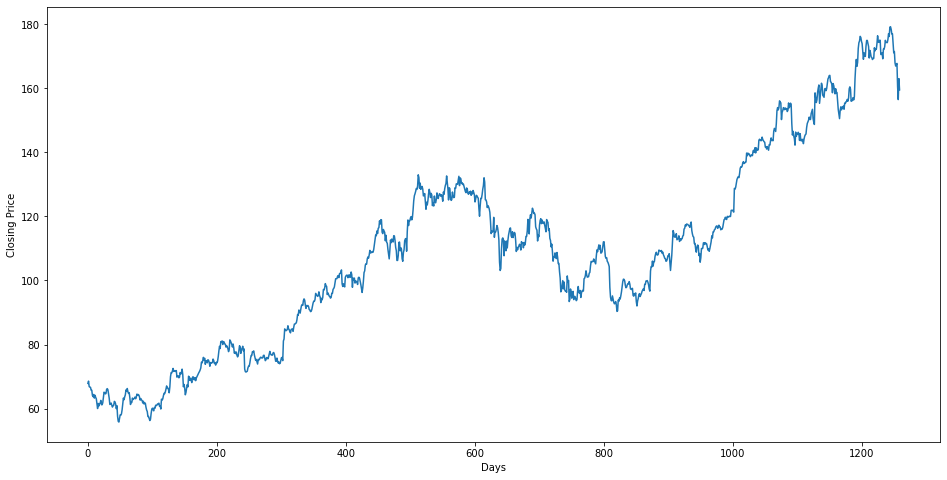

In [25]:
#  closing prices 
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(df['close'])
plt.show()

In [6]:
df2 = df['close']

In [7]:
df2.tail()

1254    167.78
1255    160.50
1256    156.49
1257    163.03
1258    159.54
Name: close, dtype: float64

In [8]:
df2 = pd.DataFrame(df2)     

In [9]:
df2.tail()

,close
1254,167.78
1255,160.50
1256,156.49
1257,163.03
1258,159.54


In [10]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['close'].shift(-future_days)

In [11]:
df2.tail()

,close,Prediction
1254,167.78,NaN
1255,160.50,NaN
1256,156.49,NaN
1257,163.03,NaN
1258,159.54,NaN


In [12]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 67.8542]
 [ 68.5614]
 [ 66.8428]
 ...
 [160.86  ]
 [159.65  ]
 [158.28  ]]


In [13]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 60.1142  59.6314  59.2928 ... 156.49   163.03   159.54  ]


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
from sklearn.tree import DecisionTreeRegressor


In [16]:

tree = DecisionTreeRegressor().fit(x_train, y_train)


In [19]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future[0:10]

array([[144.53],
       [143.68],
       [143.79],
       [143.65],
       [146.58],
       [147.51],
       [147.06],
       [146.53],
       [148.96],
       [153.01]])

In [27]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[159.88  164.325 158.73  156.07  153.39  169.8   150.55  153.39  154.23
 153.28  156.    153.81  154.48  153.48  155.39  155.3   155.84  155.9
 156.55  156.    156.41  159.88  156.41  159.76  155.98  156.25  156.17
 157.1   156.41  157.41  163.05  166.72  169.04  166.89  168.11  172.5
 174.25  167.23  176.24  175.88  174.67  171.85  171.34  169.08  171.1
 169.08  164.325 167.305 158.28  157.21  174.09  173.07  169.48  171.85
 171.05  169.8   169.04  169.32  169.32  169.37  172.67  171.7   172.27
 172.22  173.97  172.67  169.04  174.35  167.78  175.01  155.3   170.6
 171.08  169.23  172.26  172.23  173.03  175.    174.35  174.33  175.28
 175.28  175.01  176.19  179.1   179.26  178.46  177.    177.04  174.22
 171.11  171.51  167.96  166.97  167.43  167.78  177.    156.49  163.03
 159.54 ]


In [20]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


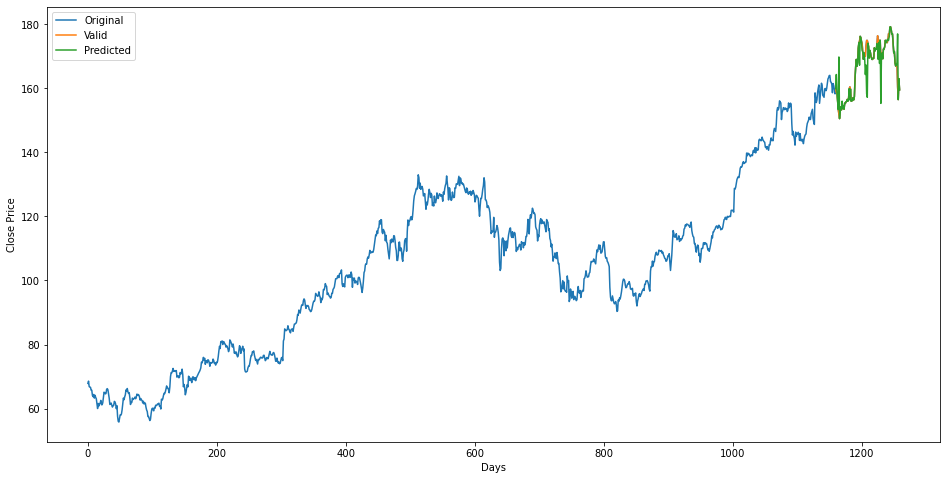

In [23]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df2['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()